# 重回帰分析　スクラッチ実装
しおんがSlackに貼ってくれたHPを参照しました。
+αで工夫したのは、教材で扱ったデータセットで試してみたことと、性能指標を定義する関数を改良したことです。

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
% config InlineBackend.figure_format ='retina'

In [190]:
from sklearn.datasets import load_boston # bostonデータを格納したクラス
boston = load_boston()

In [191]:
# DataFrameを生成
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(boston.target, columns=['TARGET'])
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [192]:
# 特徴量を抽出
X_1 = df.loc[:, ['LSTAT']].values
X_2 = df.loc[:, ['RM']].values
y = df.loc[:, ['TARGET']].values.reshape(506,)

In [193]:
m = len(X_1)
x0 = np.ones(m)
X = np.array([x0, X_1.reshape(m,), X_2.reshape(m,)]).T

# Initial Coefficients
B = np.array([0, 0, 0])
alpha = 0.0001

In [194]:
# ホールド・アウト法によるデータの分割
# random_stateを0に固定してあるので､毎回同じサンプルに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

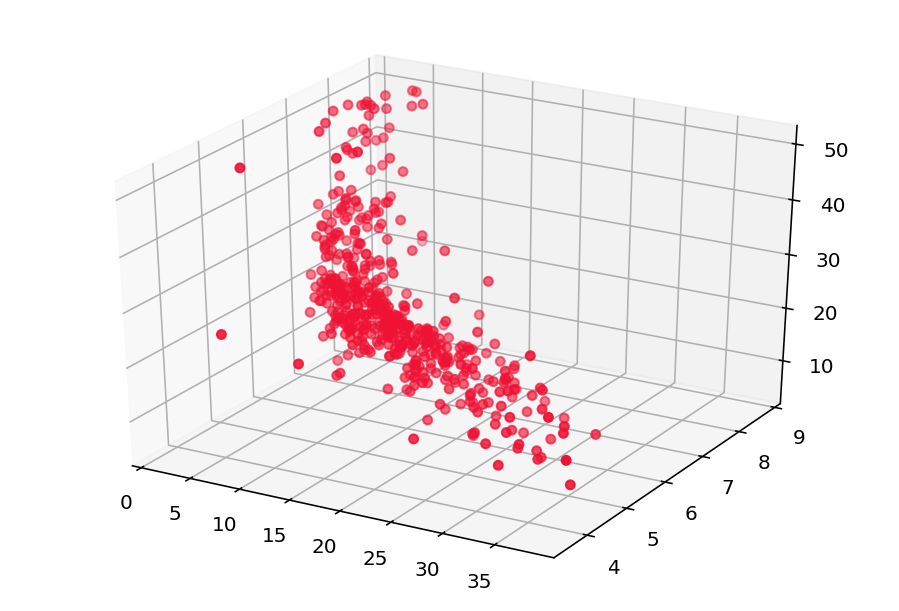

In [195]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_1, X_2, y, color='#ef1234')
plt.show()

In [196]:
def cost_function(X, y, B):
    m = len(y)
    J = np.sum((X.dot(B) - y) ** 2)/(2 * m)
    return J

In [197]:
inital_cost = cost_function(X_train, y_train, B)
print(inital_cost)

301.06069209039543


In [198]:
def gradient_descent(X, y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [199]:
# 100000 Iterations
newB, cost_history = gradient_descent(X_train, y_train, B, alpha, 100000)
theta = newB
# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[ 0.48168071 -0.67191737  4.8570286 ]
14.820424068398498


In [200]:
# Model Evaluation - RMSE
def rmse(X, y, theta):
    rmse = np.sqrt(sum((y - X.dot(theta)) ** 2) / len(y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(X, y, theta):
    mean_y = np.mean(y)
    ss_tot = sum((y - mean_y) ** 2)
    ss_res = sum((y - X.dot(theta)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [201]:
y_pred = X_train.dot(newB)

In [202]:
print('train rmse')
print(rmse(X_train, y_train, theta))
print('train r2')
print(r2_score(X_train, y_train, theta))

train rmse
5.444340927678664
train r2
0.6503153628398313


In [203]:
print('test rmse')
print(rmse(X_test, y_test, theta))
print('test r2')
print(r2_score(X_test, y_test, theta))

test rmse
5.7133195255878135
test r2
0.6079766607215746


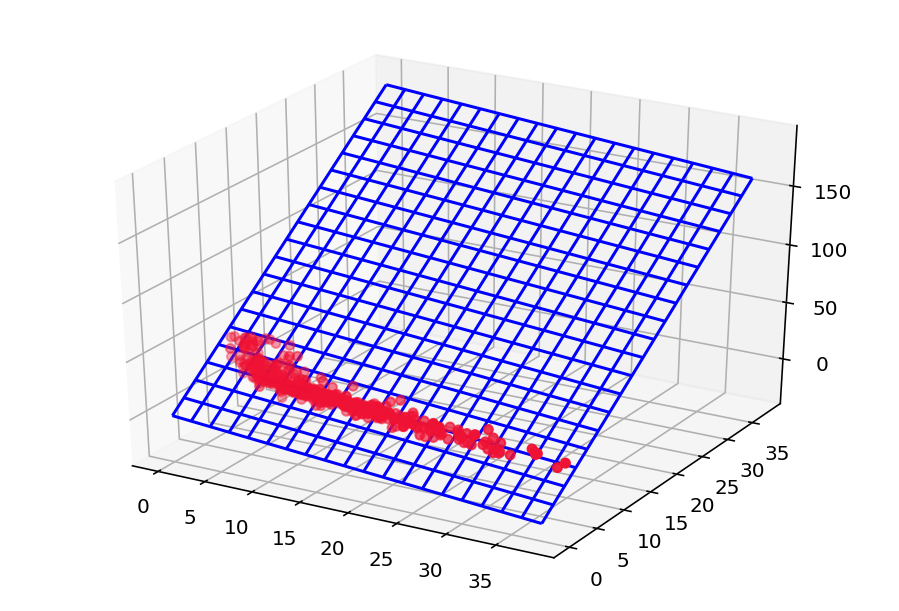

In [204]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_1, X_2, y, color='#ef1234')
x = np.arange(0, 40 , 2)
y_ = np.arange(0, 40 , 2)
X, Y = np.meshgrid(x, y_)
Z = X * newB[1] + Y * newB[2] + newB[0]
ax.plot_wireframe(X ,Y ,Z , color='blue') 
plt.show()

## クラスを定義

In [259]:
class MyLenearRegression:
    
    def __init__(self, X, y, alpha, iterations):
        self.X = X
        self.y = y
        self.alpha = alpha
        self.iterations = iterations
        
    def cost_function(self):
        m = len(self.y)
        n = self.X.shape[1]
        B = np.zeros(n)
        J = np.sum((self.X.dot(B) - self.y) ** 2)/(2 * m)
        return J
    
    def gradient_descent(self):
        cost_history = [0] * self.iterations
        m = len(self.y)
        n = self.X.shape[1]
        B = np.zeros(n)
        for iteration in range(self.iterations):
            # Hypothesis Values
            h = self.X.dot(B)
            # Difference b/w Hypothesis and Actual Y
            loss = h - self.y
            # Gradient Calculation
            gradient = self.X.T.dot(loss) / m
            # Changing Values of B using Gradient
            B = B - alpha * gradient
            # New Cost Value
            cost = self.cost_function()
            cost_history[iteration] = cost
        self.B = B
        return self.B
    
    # Model Evaluation - RMSE
    def rmse(self):
        rmse = np.sqrt(sum((self.y - self.X.dot(self.B)) ** 2) / len(self.y))
        return rmse

    # Model Evaluation - R2 Score
    def r2(self):
        mean_y = np.mean(self.y)
        ss_tot = sum((self.y - mean_y) ** 2)
        ss_res = sum((self.y - self.X.dot(self.B)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        self.r2 = r2
        return r2

In [260]:
c = MyLenearRegression(X_train, y_train,0.0001, 100000)

In [261]:
c.gradient_descent()

array([ 0.48168071, -0.67191737,  4.8570286 ])

In [262]:
c.r2()

0.6503153628398313

In [263]:
c.rmse()

5.444340927678664